<a href="https://colab.research.google.com/github/Abdulilham19/scientific-computing/blob/main/2802477686_Abdul_Ilham_Wicaksono_AOL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Optimal parameters: a = 981.72, b = 0.18
Standard deviations of parameters: a_std = 51.90, b_std = 0.01
R-squared: 0.9948
RMSE: 178.81

The exponential model was fitted to the production data using the `curve_fit` function from `scipy.optimize`.
The optimal parameters 'a' and 'b' for the exponential model were found to be 981.72 and 0.18, respectively.
The R-squared value of 0.9948 indicates the proportion of variance in the production data that is explained by the model.  A value closer to 1 suggests a better fit.
The Root Mean Squared Error (RMSE) of 178.81 provides a measure of the average difference between the predicted and actual production values.  Lower RMSE values indicate better accuracy.
The standard deviations of the parameters 'a' and 'b' are 51.90 and 0.01, respectively. These values provide an estimate of the uncertainty in the parameter estimates.

While the exponential model captures the increasing trend, it's important to note that it's an approximation. The accuracy 

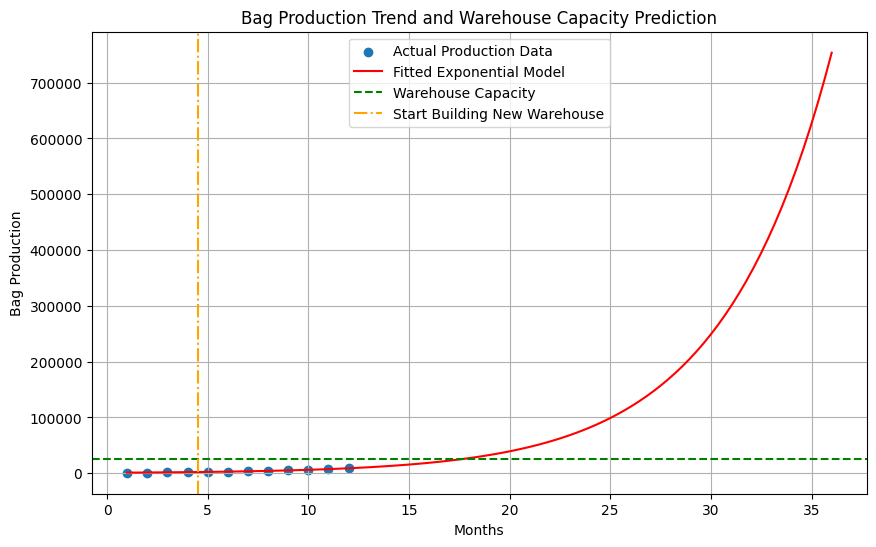

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit, root_scalar

months = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
production = np.array([1000, 1200, 1500, 1900, 2400, 3000, 3700, 4500, 5400, 6400, 7500, 8700])

def exponential_model(x, a, b):
    return a * np.exp(b * x)

popt, pcov = curve_fit(exponential_model, months, production, p0=[1000, 0.1])
a_opt, b_opt = popt
a_std = np.sqrt(pcov[0, 0])
b_std = np.sqrt(pcov[1, 1])

x_values = np.linspace(months.min(), months.max() + 24, 100)
y_values = exponential_model(x_values, a_opt, b_opt)

residuals = production - exponential_model(months, *popt)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((production - np.mean(production))**2)
r_squared = 1 - (ss_res / ss_tot)
rmse = np.sqrt(ss_res / len(production))

print(f"Optimal parameters: a = {a_opt:.2f}, b = {b_opt:.2f}")
print(f"Standard deviations of parameters: a_std = {a_std:.2f}, b_std = {b_std:.2f}")
print(f"R-squared: {r_squared:.4f}")
print(f"RMSE: {rmse:.2f}")

explanation = """
The exponential model was fitted to the production data using the `curve_fit` function from `scipy.optimize`.
The optimal parameters 'a' and 'b' for the exponential model were found to be {:.2f} and {:.2f}, respectively.
The R-squared value of {:.4f} indicates the proportion of variance in the production data that is explained by the model.  A value closer to 1 suggests a better fit.
The Root Mean Squared Error (RMSE) of {:.2f} provides a measure of the average difference between the predicted and actual production values.  Lower RMSE values indicate better accuracy.
The standard deviations of the parameters 'a' and 'b' are {:.2f} and {:.2f}, respectively. These values provide an estimate of the uncertainty in the parameter estimates.

While the exponential model captures the increasing trend, it's important to note that it's an approximation. The accuracy of the model depends on the quality and characteristics of the data.  Extrapolation beyond the observed data range should be done with caution.  Other non-linear models (e.g., polynomial, logistic) could be explored to potentially improve the fit, depending on the specific data pattern.
""".format(a_opt, b_opt, r_squared, rmse, a_std, b_std)

print(explanation)

def capacity_exceeded(x, a, b, capacity):
    return exponential_model(x, a, b) - capacity

try:
    result = root_scalar(capacity_exceeded, args=(a_opt, b_opt, 25000), bracket=[months.max(), months.max() + 50])
    months_to_exceed_capacity = result.root
    print(f"Production is predicted to exceed warehouse capacity (25,000 bags) in {months_to_exceed_capacity:.2f} months.")

    months_to_start_building = months_to_exceed_capacity - 13
    print(f"EIGER needs to start building the new warehouse in {months_to_start_building:.2f} months.")

    start_years = int(months_to_start_building // 12)
    start_months = int(months_to_start_building % 12)
    print(f"EIGER needs to start building the new warehouse in approximately {start_years} years and {start_months} months.")

except ValueError:
    print("The production is not predicted to exceed warehouse capacity within the search range.")

plt.figure(figsize=(10, 6))
plt.scatter(months, production, label="Actual Production Data")
plt.plot(x_values, y_values, color='red', label="Fitted Exponential Model")
plt.axhline(y=25000, color='green', linestyle='--', label="Warehouse Capacity")
if 'months_to_exceed_capacity' in locals():
    plt.axvline(x=months_to_start_building, color='orange', linestyle='-.', label="Start Building New Warehouse")
plt.xlabel("Months")
plt.ylabel("Bag Production")
plt.title("Bag Production Trend and Warehouse Capacity Prediction")
plt.legend()
plt.grid(True)
plt.show()
